$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}$

# Color Analysis on Enzyme Kinetics

*Erin Doan*

## Overview

Sources
https://stackoverflow.com/questions/7762948/how-to-convert-an-rgb-image-to-numpy-array

## Method

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
pixelsB = [(701,288), (775,292), (852,288), (928,286), (1010,290), (1090,285), (1166,288), (1240,288), (1312,300),
(697,363), (770,360), (848,356), (925,355), (1010,360), (1090,360), (1167,363), (1242,354), (1320,370),
(692,432), (767,434), (844,428), (925,428), (1008,434), (1090,434), (1170,435), (1246,425), (1320,440),
(692,502), (764,505), (847,508), (924,502), (1006,502), (1090,510), (1170,510), (1246,512), (1320,510),
(688,578), (764,580), (845,589), (922,578), (1004,588), (1090,586), (1168,586), (1246,588), (1317,580),
(690,647), (764,657), (842,660), (920,670), (1004,652), (1097,668), (1165,660), (1242,658), (1315,654),
(693,717), (762,725), (842,730), (926,739), (1004,735), (1090,742), (1164,730), (1240,730), (1312,722),
(697,785), (765,793), (844,798), (925,806), (1002,800), (1082,806), (1160,800), (1241,802), (1305,789)];

In [13]:
pixelsS = [(775,292), (928,286), (1090,285), (1240,288),
(770,360), (925,355), (1090,360), (1242,354),
(767,434), (925,428), (1090,434), (1246,425),
(764,505), (924,502), (1090,510), (1246,512),
(764,580), (922,578), (1090,586), (1246,588),
(764,657), (920,670), (1097,668), (1242,658),
(762,725), (926,739), (1090,742), (1240,730),
(765,793), (925,806), (1082,806), (1241,802)]

In [14]:
from PIL import Image
import numpy as np

def load_image( infilename ) :
    img = Image.open( infilename )
    img.load()
    data = np.asarray( img, dtype="int32" )
    return data

def save_image( npdata, outfilename ) :
    img = Image.fromarray( np.asarray( np.clip(npdata,0,255), dtype="uint8"), "L" )
    img.save( outfilename )
    
def swap_x_y_pixels(pixelsList) :
    temp = 0,0
    pix_list = []
    for tup in pixelsList: 
        temp1 = tup[1]
        temp0 = tup[0]
        tup = (temp1, temp0)
        pix_list.append(tup)
    return pix_list

In [15]:
class Pixel:
    def __init__(self, x, y, RGB):
        self.x = x
        self.y = y
        self.r = RGB[0]
        self.g = RGB[1]
        self.b = RGB[2]
    def __str__(self):
        #return "Pixel: at (x,y) = (" + str(self.x) + "," + str(self.y) + ") with (r,g,b) = (" + str(self.r) + "," + str(self.g) + "," + str(self.b) +")"
        return "Pixel at location (" + str(int(self.y)) + ", " + str(int(self.x)) + ") with RGB of (" + str(self.r) + ", " + str(self.g) + ", " + str(self.b) +")."
    def distanceFromTarget(self, targetRGB):
        distances = [0,0,0]
        distances[0] = abs(self.r - targetRGB[0])
        distances[1] = abs(self.g - targetRGB[1])
        distances[2] = abs(self.b - targetRGB[2])
        #print("<Pixel> self.RGB is " + str(self.r) +str(self.g) + str(self.b))
        #print("<Pixel> target RGB is " + str(targetRGB))
        #print("<Pixel> distance from Target " + str(distances))
        return max(distances)
    def getXY(self):
        return (self.x,self.y)
    def getRGB(self):
        return (self.r,self.g,self.b)
    def __eq__(self, other):
        if isinstance(other, self.__class__):
            #print("<Pixel> check if pixels equal self " + str(self) + " other " + str(other))
            #print(str(self.x) + " " + str(other.x) + " " + str(self.x == other.x))
            #print(self.y is other.y)
            return self.x == other.x and self.y == other.y and self.r == other.r and self.g == other.g and self.b == other.b
        else:
            #print("<Pixel> check if pixels equal - not same class")
            return False
    def __ne__(self, other):
        return not self.__eq__(other)

In [16]:
def indexThroughList(image, indexList, convert):
    listReturn = []
    for tup in indexList:
        if(convert):
            RGB = (255,255,255) - image[tup]
        else:
            RGB = image[tup]
        listReturn.append(Pixel(tup[0], tup[1], RGB))
    return listReturn
def printListOfPixels(listPixels):
    for l in listPixels:
        print(str(l))

In [17]:
class FloodFill:
    def __init__(self, image, pix, thres):
        self.image = image
        self.startPixel = pix
        self.threshold = thres
        self.selection = []
        self.targetRGB= pix.getRGB()
    def __str__(self):
        return "FloodFill: at Pixel = (" + str(self.startPixel) + ") with threshold: " + str(self.threshold)
    def getSelection(self):
        return self.selection
    def withinThreshold(self, pixel):
        #print("<FloodFill> check threshold for "+ str(pixel) + " is " + str (self.threshold) + " is >= to " + str(abs(pixel.distanceFromTarget(self.targetRGB))) + " result is " +  str(self.threshold >= abs(pixel.distanceFromTarget(self.targetRGB))))
        if(self.threshold >= abs(pixel.distanceFromTarget(self.targetRGB))):
            return True
        else:
            return False
    def withinBounds(self, x, y):
        #print("<FloodFill> within Bounds check if (x,y)) " + str(x) + "," + str(y) + " " + str (x>=0 and y>=0 and x<self.image.shape[0] and y<self.image.shape[1]))
        if(x>=0 and y>=0 and x<self.image.shape[0] and y<self.image.shape[1]):
            return True
        else:
            return False
    def flood_fill(self, pixel, prev_x, prev_y):
        #print("<FloodFill> flood fill with " + str(pixel))
        if(pixel is None):
            return
        #print("<FloodFill> contains check " + str(any(x == pixel for x in self.selection)))
        """
        print("<FloodFill> selection ")
        for s in self.selection:
            print(str(s))
        print()
        
        print("********* BEFORE CHECK")
        for s in self.selection:
            print("<FloodFill> checking if list contains this pixel " + str(s == pixel))
            if(s == pixel):
                print("<FloodFill> Returning since list contains this pixel*****")
                return
        print("********* After CHECK")
        """
        if(any(x == pixel for x in self.selection)): 
            return
        if(self.withinThreshold(pixel)):
            self.selection.append(pixel)
        else:
            return
        (x,y) = pixel.getXY()
        if(prev_x is x and prev_y is y):
            return
        #recurse
        if(self.withinBounds(x,(y-1))):
            self.flood_fill(Pixel(x, y-1, self.image[x,y-1]), x, y)
        else:
            return
        if(self.withinBounds(x,(y+1))):
            self.flood_fill(Pixel(x, y+1, self.image[x,y+1]), x, y)
        else:
            return
        if(self.withinBounds((x-1),y)):
            self.flood_fill(Pixel(x-1, y, self.image[x-1,y]), x, y)
        else:
            return
        if(self.withinBounds((x+1),y)):
            self.flood_fill(Pixel(x+1, y,self.image[x+1,y]), x, y)
        else:
            return
        

In [18]:
import statistics
class PixelAreaSelection:
    def __init__(self, image, pix, thres):
        self.image = image
        self.startPixel = pix
        self.threshold = thres
        self.selection = []
        self.avg_x = 0.0
        self.avg_y = 0.0
    def __str__(self):
        return "PixelAreaSelection: at Pixel = (" + str(self.startPixel) + ") with threshold: " + str(self.threshold)
    def getSelection(self):
        return self.selection
    def runFloodFill(self):
        #print("<PixelAreaSelection> Let's run flood fill starting at " + str(self.startPixel))
        fill = FloodFill(self.image, self.startPixel, self.threshold)
        fill.flood_fill(self.startPixel, -1, -1)
        #print("<PixelAreaSelection> flood fill " + str(fill))
        self.selection = fill.getSelection()
        #print("<PixelAreaSelection> selection " + str(self.selection))
        
    def avgCoordinateInSelection(self):
        numOfPixels = len(self.selection)
        for p in self.selection:
            x,y =  p.getXY()
            self.avg_x += x
            self.avg_y += y
        if(self.avg_x != 0.0):
            self.avg_x /= (numOfPixels * 1.0)
        if(self.avg_y != 0.0):
            self.avg_y /= (numOfPixels * 1.0)
    def averagePixelSelection(self):
        numOfPixels = len(self.selection)
        avg_r = 0.0
        avg_g = 0.0
        avg_b = 0.0
        for p in self.selection:
            r,g,b =  p.getRGB()
            avg_r += r
            avg_g += g
            avg_b += b
        if(avg_r != 0.0):
            avg_r /= (numOfPixels * 1.0)
        if(avg_g != 0.0):
            avg_g /= (numOfPixels * 1.0)
        if(avg_b != 0.0):
            avg_b /= (numOfPixels * 1.0)
        self.avgCoordinateInSelection()
        return Pixel(self.avg_x, self.avg_y, (avg_r, avg_g, avg_b))
    def medianPixelSelection(self):
        numOfPixels = len(self.selection)
        list_r = []
        list_g = []
        list_b = []
        for p in self.selection:
            r,g,b =  p.getRGB()
            list_r.append(r)
            list_g.append(g)
            list_b.append(b)
        
        self.avgCoordinateInSelection()
        return Pixel(self.avg_x, self.avg_y, (avg_r, avg_g, avg_b))
    def getAveragePixelFromSelection(self):
        self.runFloodFill()
        return self.medianPixelSelection()
        #return self.averagePixelSelection()


In [26]:
"""

def run(filename,threshold):
    #imagedata = load_image(filename)
    stream = open(filename, 'r')
    print(stream)
    stream.seek(0)
    width = 1920
    height = 1080
    fwidth = (width + 31) // 32 * 32
    fheight = (height + 15)
    image = np.fromfile(stream, dtype=np.uint8)
    #.\
        #reshape((fheight, fwidth, 3))[:height, :width, :]
    
    print(image)
    # If you wish, the following code will convert the image's bytes into
    # floating point values in the range 0 to 1 (a typical format for some
    # sorts of analysis)
    image = image.astype(np.float, copy=False)
    image = image / 255.0
    
    print(str(filename) +  " shape is " + str(imagedata.shape))
    pixels = swap_x_y_pixels(pixelsS)
    #pixels = pixelsB
    listOfPixels = indexThroughList(imagedata, pixels, convert)
    #print("listOfPixels: ")
    #for l in listOfPixels:
    #    print(str(l))
    values = []
    #pixelSelections = []
    for l in listOfPixels:
        p = PixelAreaSelection(imagedata, l, threshold)
        #pixelSelections.append(p)
        values.append(p.getAveragePixelFromSelection().getRGB())
    #print("listOfPixelSelections: ")
    #for l in pixelSelections:
    #    print(str(l))        
    #return imagedata,pixelSelections,values
    return values
    """;

In [27]:
def run(filename,threshold, raw):
    #imagedata = load_image(filename)
    stream = open(filename, 'rb')
    #print("Stream " + str(stream))
    width = 1920
    height = 1080
    fwidth = (width) #nearest multiple of 32
    fheight = (height + 8) #nearest multiple of 16
    image = np.fromfile(stream, dtype=np.uint8)
    image = image.reshape((fheight, fwidth, 3))[:height, :width, :]
    
    #print(image)
    # If you wish, the following code will convert the image's bytes into
    # floating point values in the range 0 to 1 (a typical format for some
    # sorts of analysis)
    imagedata = image.astype(np.float, copy=False)
    #imagedata = image / 255.0
    print(imagedata)
    print(str(filename) +  " shape is " + str(imagedata.shape))
    pixels = swap_x_y_pixels(pixelsS)
    #pixels = pixelsB
    
    convert = True
    listOfPixels = indexThroughList(imagedata, pixels, convert)
    #print("listOfPixels: ")
    #for l in listOfPixels:
    #    print(str(l))
    values = []
    pixelSelections = []
    for l in listOfPixels:
        p = PixelAreaSelection(imagedata, l, threshold)
        pixelSelections.append(p)
        values.append(p.getAveragePixelFromSelection().getRGB())
    print("listOfPixelSelections: ")
    for l in pixelSelections:
        print(str(l))        
    #return imagedata,pixelSelections,values
    return values

In [74]:
threshold = 30
filenames = ["./imgs_testRun1/testRun_1_picture_1",
            "./imgs_testRun1/testRun_1_picture_5",
            "./imgs_testRun1/testRun_1_picture_10",
            "./imgs_testRun1/testRun_1_picture_15",
            "./imgs_testRun1/testRun_1_picture_20",
            "./imgs_testRun1/testRun_1_picture_25",
            "./imgs_testRun1/testRun_1_picture_30",
            "./imgs_testRun1/testRun_1_picture_35",
            "./imgs_testRun1/testRun_1_picture_40",
            "./imgs_testRun1/testRun_1_picture_45",
            "./imgs_testRun1/testRun_1_picture_50",
            "./imgs_testRun1/testRun_1_picture_55",
            "./imgs_testRun1/testRun_1_picture_60",
            "./imgs_testRun1/testRun_1_picture_65",
            "./imgs_testRun1/testRun_1_picture_70",
            "./imgs_testRun1/testRun_1_picture_75",
            "./imgs_testRun1/testRun_1_picture_80",
            "./imgs_testRun1/testRun_1_picture_85",
            "./imgs_testRun1/testRun_1_picture_90",
            "./imgs_testRun1/testRun_1_picture_95",
            "./imgs_testRun1/testRun_1_picture_110",
            "./imgs_testRun1/testRun_1_picture_115",
            "./imgs_testRun1/testRun_1_picture_119"]

valuesList = []
for f in filenames:
    valuesList.append(run(f, threshold, "raw"))
graphList = []
for t in range(0,32):
    graphList.append([])
for vals in valuesList:
    for i in range(0,len(vals)):
        graphList[i].append(vals[i])

graphList

[[[ 182.  185.  199.]
  [ 180.  183.  197.]
  [ 180.  181.  194.]
  ..., 
  [ 189.  199.  204.]
  [ 193.  203.  210.]
  [ 190.  200.  207.]]

 [[ 175.  178.  192.]
  [ 174.  177.  191.]
  [ 176.  177.  190.]
  ..., 
  [ 192.  202.  207.]
  [ 190.  200.  207.]
  [ 186.  196.  203.]]

 [[ 171.  177.  188.]
  [ 173.  179.  190.]
  [ 180.  182.  190.]
  ..., 
  [ 190.  203.  207.]
  [ 190.  200.  205.]
  [ 189.  199.  204.]]

 ..., 
 [[ 194.  213.  216.]
  [ 190.  210.  212.]
  [ 188.  210.  214.]
  ..., 
  [ 169.  209.  211.]
  [ 166.  208.  212.]
  [ 166.  208.  212.]]

 [[ 193.  210.  213.]
  [ 193.  210.  213.]
  [ 191.  212.  217.]
  ..., 
  [ 175.  205.  213.]
  [ 171.  204.  211.]
  [ 164.  197.  204.]]

 [[ 192.  209.  212.]
  [ 193.  210.  213.]
  [ 193.  215.  219.]
  ..., 
  [ 174.  204.  212.]
  [ 172.  205.  212.]
  [ 166.  199.  206.]]]
./imgs_testRun1/testRun_1_picture_1 shape is (1080, 1920, 3)
listOfPixelSelections: 
PixelAreaSelection: at Pixel = (Pixel at location (775, 

listOfPixelSelections: 
PixelAreaSelection: at Pixel = (Pixel at location (775, 292) with RGB of (92.0, 108.0, 113.0).) with threshold: 30
PixelAreaSelection: at Pixel = (Pixel at location (928, 286) with RGB of (89.0, 103.0, 108.0).) with threshold: 30
PixelAreaSelection: at Pixel = (Pixel at location (1090, 285) with RGB of (85.0, 99.0, 104.0).) with threshold: 30
PixelAreaSelection: at Pixel = (Pixel at location (1240, 288) with RGB of (88.0, 100.0, 105.0).) with threshold: 30
PixelAreaSelection: at Pixel = (Pixel at location (770, 360) with RGB of (78.0, 90.0, 95.0).) with threshold: 30
PixelAreaSelection: at Pixel = (Pixel at location (925, 355) with RGB of (73.0, 79.0, 82.0).) with threshold: 30
PixelAreaSelection: at Pixel = (Pixel at location (1090, 360) with RGB of (71.0, 77.0, 80.0).) with threshold: 30
PixelAreaSelection: at Pixel = (Pixel at location (1242, 354) with RGB of (110.0, 116.0, 121.0).) with threshold: 30
PixelAreaSelection: at Pixel = (Pixel at location (767, 43

[[[ 184.  186.  202.]
  [ 187.  189.  205.]
  [ 188.  186.  202.]
  ..., 
  [ 191.  200.  210.]
  [ 191.  201.  208.]
  [ 189.  199.  206.]]

 [[ 183.  185.  201.]
  [ 182.  184.  200.]
  [ 187.  185.  201.]
  ..., 
  [ 188.  197.  207.]
  [ 192.  202.  209.]
  [ 187.  197.  204.]]

 [[ 184.  182.  201.]
  [ 184.  182.  201.]
  [ 187.  185.  201.]
  ..., 
  [ 184.  198.  204.]
  [ 190.  202.  209.]
  [ 187.  199.  206.]]

 ..., 
 [[ 191.  210.  220.]
  [ 187.  205.  215.]
  [ 189.  207.  217.]
  ..., 
  [ 180.  208.  217.]
  [ 177.  204.  213.]
  [ 178.  205.  215.]]

 [[ 189.  207.  217.]
  [ 187.  205.  215.]
  [ 193.  209.  220.]
  ..., 
  [ 181.  206.  216.]
  [ 177.  204.  213.]
  [ 177.  204.  213.]]

 [[ 183.  201.  211.]
  [ 187.  205.  215.]
  [ 187.  203.  214.]
  ..., 
  [ 182.  207.  217.]
  [ 178.  205.  215.]
  [ 175.  203.  212.]]]
./imgs_testRun1/testRun_1_picture_40 shape is (1080, 1920, 3)
listOfPixelSelections: 
PixelAreaSelection: at Pixel = (Pixel at location (775,

listOfPixelSelections: 
PixelAreaSelection: at Pixel = (Pixel at location (775, 292) with RGB of (102.0, 118.0, 120.0).) with threshold: 30
PixelAreaSelection: at Pixel = (Pixel at location (928, 286) with RGB of (95.0, 110.0, 112.0).) with threshold: 30
PixelAreaSelection: at Pixel = (Pixel at location (1090, 285) with RGB of (96.0, 108.0, 111.0).) with threshold: 30
PixelAreaSelection: at Pixel = (Pixel at location (1240, 288) with RGB of (101.0, 113.0, 116.0).) with threshold: 30
PixelAreaSelection: at Pixel = (Pixel at location (770, 360) with RGB of (82.0, 94.0, 97.0).) with threshold: 30
PixelAreaSelection: at Pixel = (Pixel at location (925, 355) with RGB of (78.0, 87.0, 87.0).) with threshold: 30
PixelAreaSelection: at Pixel = (Pixel at location (1090, 360) with RGB of (77.0, 83.0, 84.0).) with threshold: 30
PixelAreaSelection: at Pixel = (Pixel at location (1242, 354) with RGB of (108.0, 119.0, 120.0).) with threshold: 30
PixelAreaSelection: at Pixel = (Pixel at location (767,

[[[ 194.  189.  206.]
  [ 194.  189.  206.]
  [ 196.  195.  208.]
  ..., 
  [ 187.  194.  199.]
  [ 194.  198.  204.]
  [ 193.  197.  203.]]

 [[ 195.  190.  207.]
  [ 199.  194.  211.]
  [ 197.  196.  209.]
  ..., 
  [ 188.  195.  200.]
  [ 194.  198.  204.]
  [ 195.  199.  205.]]

 [[ 202.  200.  216.]
  [ 196.  194.  210.]
  [ 195.  194.  205.]
  ..., 
  [ 189.  196.  201.]
  [ 195.  199.  205.]
  [ 192.  196.  202.]]

 ..., 
 [[ 173.  196.  204.]
  [ 173.  196.  204.]
  [ 177.  198.  207.]
  ..., 
  [ 181.  209.  216.]
  [ 178.  206.  213.]
  [ 182.  210.  217.]]

 [[ 174.  195.  204.]
  [ 174.  195.  204.]
  [ 178.  197.  207.]
  ..., 
  [ 183.  209.  216.]
  [ 184.  209.  219.]
  [ 182.  207.  217.]]

 [[ 176.  196.  206.]
  [ 183.  203.  213.]
  [ 176.  194.  204.]
  ..., 
  [ 182.  207.  215.]
  [ 183.  208.  218.]
  [ 181.  206.  216.]]]
./imgs_testRun1/testRun_1_picture_70 shape is (1080, 1920, 3)
listOfPixelSelections: 
PixelAreaSelection: at Pixel = (Pixel at location (775,

listOfPixelSelections: 
PixelAreaSelection: at Pixel = (Pixel at location (775, 292) with RGB of (95.0, 111.0, 115.0).) with threshold: 30
PixelAreaSelection: at Pixel = (Pixel at location (928, 286) with RGB of (93.0, 105.0, 108.0).) with threshold: 30
PixelAreaSelection: at Pixel = (Pixel at location (1090, 285) with RGB of (96.0, 108.0, 109.0).) with threshold: 30
PixelAreaSelection: at Pixel = (Pixel at location (1240, 288) with RGB of (104.0, 116.0, 117.0).) with threshold: 30
PixelAreaSelection: at Pixel = (Pixel at location (770, 360) with RGB of (86.0, 98.0, 101.0).) with threshold: 30
PixelAreaSelection: at Pixel = (Pixel at location (925, 355) with RGB of (78.0, 87.0, 87.0).) with threshold: 30
PixelAreaSelection: at Pixel = (Pixel at location (1090, 360) with RGB of (78.0, 80.0, 82.0).) with threshold: 30
PixelAreaSelection: at Pixel = (Pixel at location (1242, 354) with RGB of (75.0, 81.0, 82.0).) with threshold: 30
PixelAreaSelection: at Pixel = (Pixel at location (767, 43

  [ 186.  208.  219.]]]
./imgs_testRun1/testRun_1_picture_119 shape is (1080, 1920, 3)
listOfPixelSelections: 
PixelAreaSelection: at Pixel = (Pixel at location (775, 292) with RGB of (93.0, 109.0, 113.0).) with threshold: 30
PixelAreaSelection: at Pixel = (Pixel at location (928, 286) with RGB of (90.0, 102.0, 105.0).) with threshold: 30
PixelAreaSelection: at Pixel = (Pixel at location (1090, 285) with RGB of (92.0, 107.0, 109.0).) with threshold: 30
PixelAreaSelection: at Pixel = (Pixel at location (1240, 288) with RGB of (96.0, 111.0, 113.0).) with threshold: 30
PixelAreaSelection: at Pixel = (Pixel at location (770, 360) with RGB of (83.0, 95.0, 100.0).) with threshold: 30
PixelAreaSelection: at Pixel = (Pixel at location (925, 355) with RGB of (73.0, 82.0, 82.0).) with threshold: 30
PixelAreaSelection: at Pixel = (Pixel at location (1090, 360) with RGB of (76.0, 81.0, 82.0).) with threshold: 30
PixelAreaSelection: at Pixel = (Pixel at location (1242, 354) with RGB of (70.0, 76.0,

[[(134.25, 129.75, 129.75),
  (102.0, 112.0, 116.0),
  (92.0, 108.0, 113.0),
  (98.0, 114.0, 118.0),
  (88.0, 106.0, 111.0),
  (89.0, 107.0, 112.0),
  (88.0, 107.0, 110.0),
  (96.0, 112.0, 116.0),
  (94.0, 110.0, 114.0),
  (97.0, 113.0, 117.0),
  (102.0, 118.0, 120.0),
  (98.0, 114.0, 119.0),
  (99.0, 115.0, 120.0),
  (94.0, 112.0, 117.0),
  (92.0, 110.0, 115.0),
  (92.0, 110.0, 115.0),
  (95.0, 113.0, 118.0),
  (95.0, 111.0, 115.0),
  (96.0, 112.0, 116.0),
  (90.0, 108.0, 115.0),
  (91.0, 107.0, 109.0),
  (92.0, 108.0, 112.0),
  (93.0, 109.0, 113.0)],
 [(102.0, 111.0, 113.0),
  (99.0, 109.0, 115.0),
  (89.0, 103.0, 108.0),
  (90.0, 104.0, 109.0),
  (88.0, 104.0, 109.0),
  (87.0, 103.0, 107.0),
  (86.0, 101.0, 103.0),
  (92.0, 107.0, 109.0),
  (91.0, 106.0, 108.0),
  (96.0, 110.0, 115.0),
  (95.0, 110.0, 112.0),
  (96.0, 108.0, 111.0),
  (93.0, 108.0, 110.0),
  (92.0, 106.0, 111.0),
  (96.0, 111.0, 113.0),
  (92.0, 106.0, 111.0),
  (92.0, 106.0, 111.0),
  (93.0, 105.0, 108.0),
  (93.0,

RValues
Plot: 0
[ 134.25  102.     92.     98.     88.     89.     88.     96.     94.
   97.    102.     98.     99.     94.     92.     92.     95.     95.
   96.     90.     91.     92.     93.  ]


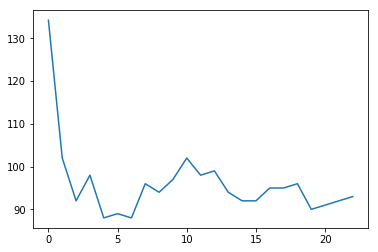

Plot: 1
[ 102.   99.   89.   90.   88.   87.   86.   92.   91.   96.   95.   96.
   93.   92.   96.   92.   92.   93.   93.   92.   93.   89.   90.]


Plot: 2
[ 98.  95.  85.  94.  88.  85.  88.  89.  87.  89.  96.  97.  98.  94.  94.
  95.  96.  96.  95.  93.  95.  95.  92.]


Plot: 3
[  83.  108.   88.   98.   90.   89.   97.   93.   98.   96.  101.  100.
  102.  100.  100.   98.  101.  104.   98.   96.  100.   95.   96.]


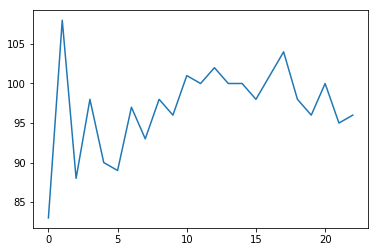

Plot: 4
[ 92.  89.  78.  82.  74.  75.  75.  78.  77.  83.  82.  87.  85.  87.  88.
  86.  85.  86.  88.  83.  83.  82.  83.]


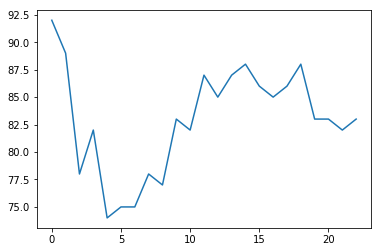

Plot: 5
[ 81.  76.  73.  77.  70.  72.  72.  72.  73.  77.  78.  75.  76.  76.  76.
  72.  76.  78.  77.  73.  75.  72.  73.]


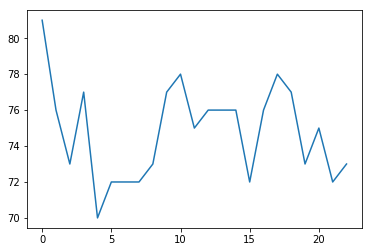

Plot: 6
[ 83.  79.  71.  75.  71.  70.  74.  73.  74.  76.  77.  77.  80.  71.  76.
  74.  77.  78.  79.  70.  73.  72.  76.]


Plot: 7
[ 180.       85.      110.      139.8125  103.      109.      102.      109.
  106.      108.      108.       78.       74.       74.       77.       74.
   72.       75.       74.       69.       74.       71.       70.    ]


Plot: 8
[ 134.  189.   98.  104.   97.   94.   96.   96.  100.  103.  101.   82.
   83.   76.   80.   78.   80.   82.   80.   77.   79.   79.   77.]


Plot: 9
[ 187.          188.          103.          108.           99.          104.
  101.          108.          105.          121.62258953  124.22877358
  183.          185.          187.          185.          182.          186.
  185.          185.          183.          184.          179.          188.        ]


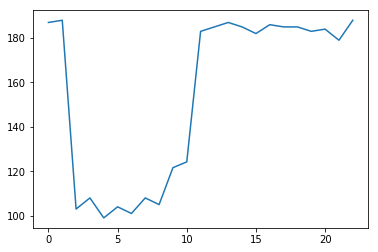

Plot: 10
[  82.  162.  176.  184.  181.  177.  181.  183.  177.  184.  184.  104.
  105.  105.  105.  103.  103.  107.   98.   98.  103.  104.  106.]


Plot: 11
[ 176.  176.   86.   94.   85.   91.   89.   89.   89.   89.   92.  179.
  176.  180.  180.  177.  177.  180.  176.  176.  175.  177.  177.]


Plot: 12
[ 105.  137.   95.  101.   89.   93.   90.   96.   96.  100.   98.  154.
  162.  159.  151.  154.  155.  152.  154.  149.  164.  156.  157.]


Plot: 13
[ 189.          187.          133.89686099  113.          129.72727273
  109.          132.16666667  130.66666667  135.28571429  127.          120.
  183.          184.          182.          181.          183.          182.
  184.          185.          179.          182.          183.          181.        ]


Plot: 14
[ 184.   85.  181.  186.  178.  182.  181.  184.  182.  190.  185.  110.
  109.  129.  108.  110.  112.  110.  108.  112.  110.  109.  112.]


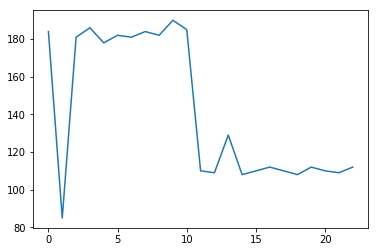

Plot: 15
[ 179.  169.   92.   91.   88.   89.   90.   95.   95.   90.   96.  111.
  108.  106.  109.  108.  108.  110.  106.  103.  111.  105.  106.]


Plot: 16
[ 106.  104.  105.  109.  101.  101.  102.  105.  105.  105.  111.  186.
  184.  184.  185.  182.  185.  186.  184.  180.  181.  183.  183.]


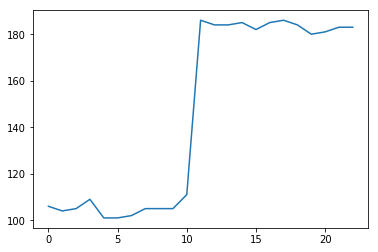

Plot: 17
[ 190.  163.  131.  130.  131.  132.  132.  132.  131.  133.  134.  190.
  191.  188.  190.  193.  189.  190.  191.  187.  188.  187.  189.]


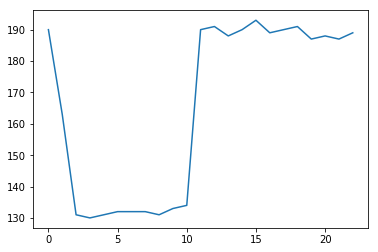

Plot: 18
[ 173.      120.4375  185.      187.      181.      183.      187.      181.
  184.      188.      190.      119.      123.      116.      116.      117.
  113.      113.      108.      110.      115.      118.      116.    ]


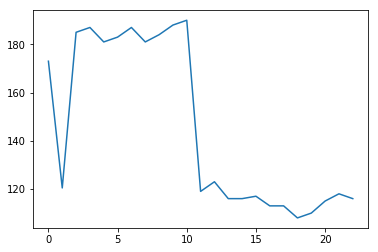

Plot: 19
[ 169.  176.  173.  178.  171.  174.  175.  179.  180.  179.  178.  111.
  110.  104.  111.  111.  110.  114.  111.  107.  109.  111.  107.]


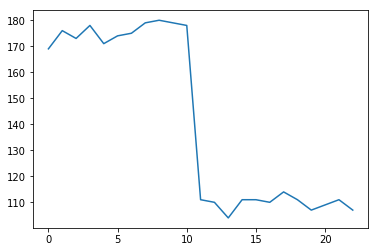

Plot: 20
[ 112.   98.  127.  124.  123.  120.  117.  132.  119.  124.  124.  152.
  148.  154.  152.  153.  156.  152.  160.  147.  154.  156.  152.]


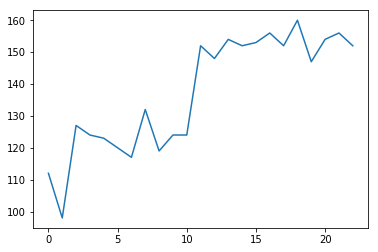

Plot: 21
[ 195.  195.  194.  196.  192.  190.  196.  194.  195.  196.  194.  192.
  191.  189.  190.  186.  188.  186.  187.  189.  190.  191.  190.]


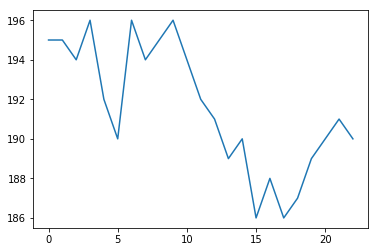

Plot: 22
[ 101.  191.  191.  191.  190.  190.  187.  189.  192.  194.  192.  194.
  192.  192.  195.  195.  195.  193.  192.  192.  191.  194.  191.]


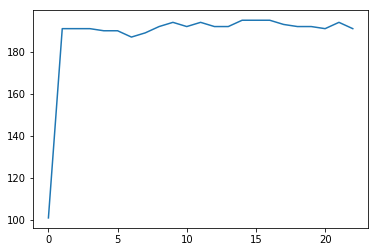

Plot: 23
[ 114.  176.  182.  185.  179.  184.  183.  184.  186.  185.  184.  112.
  113.  110.  109.  111.  113.  113.  111.  109.  111.  112.  112.]


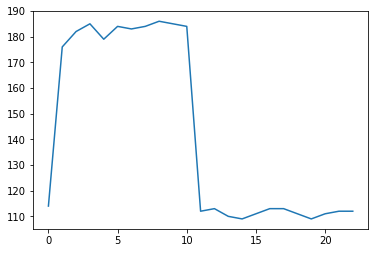

Plot: 24
[ 138.  103.  108.  118.  112.  110.  112.  111.  106.  112.  115.  168.
  166.  165.  167.  167.  167.  166.  164.  160.  164.  168.  168.]


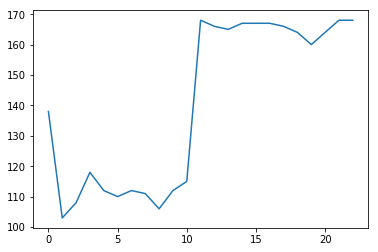

Plot: 25
[ 197.  192.  194.  196.  193.  193.  190.  191.  195.  194.  195.  195.
  193.  192.  194.  196.  190.  196.  194.  191.  195.  193.  187.]


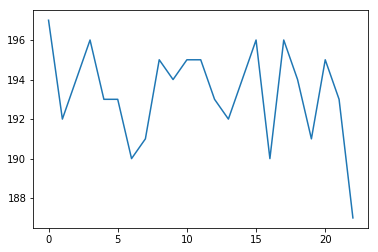

Plot: 26
[ 103.  143.  168.  180.  178.  173.  176.  180.  176.  177.  181.  191.
  193.  191.  192.  192.  192.  191.  192.  190.  190.  192.  188.]


Plot: 27
[ 132.  127.  157.  161.  157.  160.  157.  168.  159.  161.  165.  133.
  135.  129.  121.  125.  127.  134.  127.  122.  128.  130.  126.]


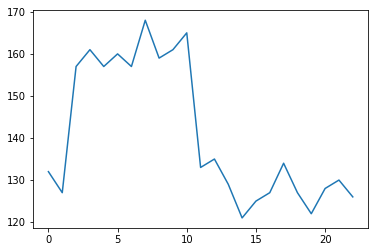

Plot: 28
[ 186.  108.  114.  117.  111.  110.  110.  111.  115.  115.  120.  190.
  189.  185.  190.  184.  189.  188.  188.  186.  189.  185.  186.]


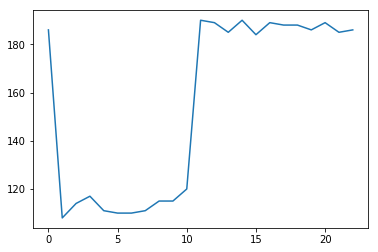

Plot: 29
[ 154.  189.  193.  195.  189.  189.  190.  191.  193.  192.  193.  194.
  192.  194.  193.  191.  192.  189.  195.  191.  192.  194.  192.]


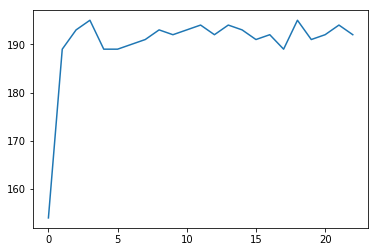

Plot: 30
[ 194.  197.  194.  197.  192.  194.  193.  194.  195.  193.  194.  193.
  195.  193.  193.  194.  193.  195.  191.  192.  190.  192.  191.]


Plot: 31
[ 167.  127.  146.  159.  150.  150.  146.  152.  154.  151.  152.  185.
  181.  176.  180.  183.  177.  180.  182.  180.  178.  182.  183.]


In [82]:
print("RValues")
plt.figure(1)
for i in range(0,len(graphList)):
    print("Plot: " + str(i))
    rList = []
    for r,g,b in graphList[i]:
        rList.append(r)
    rList = np.array(rList)    
    nImages = len(rList)
    plt.figure(1)
    print(rList)
    plt.plot(rList)
    plt.savefig("Rvalues "+str(i) +".png")
    plt.show()

G Values
Plot: 0
[ 129.75  112.    108.    114.    106.    107.    107.    112.    110.
  113.    118.    114.    115.    112.    110.    110.    113.    111.
  112.    108.    107.    108.    109.  ]


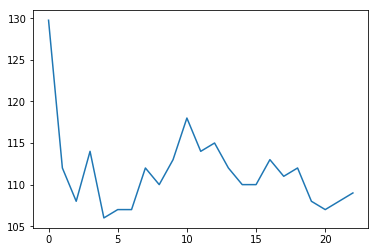

Plot: 1
[ 111.  109.  103.  104.  104.  103.  101.  107.  106.  110.  110.  108.
  108.  106.  111.  106.  106.  105.  108.  108.  105.  104.  102.]


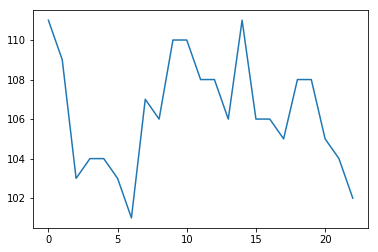

Plot: 2
[ 106.  107.   99.  105.  102.   99.  103.  104.  102.  103.  108.  109.
  110.  108.  109.  109.  110.  108.  107.  107.  107.  107.  107.]


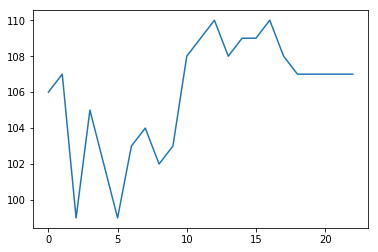

Plot: 3
[  89.  118.  100.  110.  105.  104.  109.  105.  110.  108.  113.  112.
  114.  115.  115.  114.  113.  116.  113.  110.  112.  110.  111.]


Plot: 4
[  97.   95.   90.   92.   90.   89.   90.   93.   89.   95.   94.   99.
   97.   96.  100.   98.   96.   98.  100.   97.   95.   92.   95.]


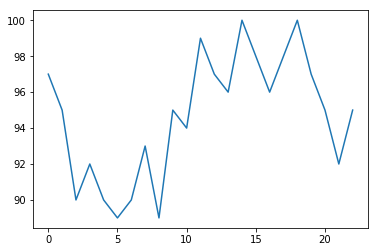

Plot: 5
[ 83.  80.  79.  83.  79.  81.  81.  81.  82.  83.  87.  84.  85.  85.  85.
  83.  85.  87.  86.  83.  84.  81.  82.]


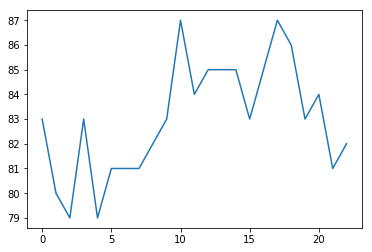

Plot: 6
[ 85.  83.  77.  81.  77.  75.  79.  79.  80.  81.  83.  82.  85.  77.  82.
  79.  82.  80.  81.  76.  75.  77.  81.]


Plot: 7
[ 182.        89.       116.       133.84375  112.       115.       113.
  118.       112.       119.       119.        84.        80.        80.
   81.        80.        78.        81.        80.        77.        79.
   77.        76.     ]


Plot: 8
[ 141.  192.  113.  117.  114.  113.  115.  115.  119.  120.  122.   90.
   93.   92.   92.   90.   92.   90.   92.   91.   90.   91.   92.]


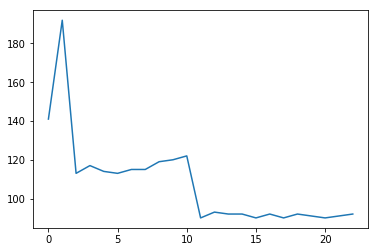

Plot: 9
[ 187.          188.          114.          119.          114.          120.
  117.          124.          121.          114.36914601  116.90566038
  186.          188.          188.          188.          185.          187.
  187.          186.          186.          186.          182.          191.        ]


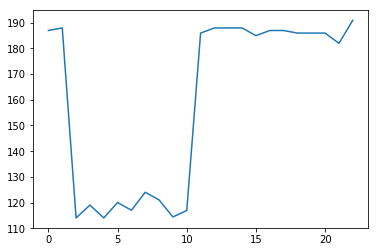

Plot: 10
[  82.  160.  176.  181.  182.  179.  183.  185.  179.  186.  186.  118.
  118.  120.  120.  118.  116.  122.  116.  115.  119.  120.  122.]


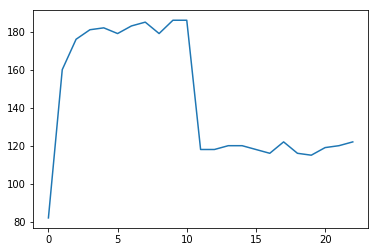

Plot: 11
[ 176.  173.   90.   95.   89.   89.   98.   95.   98.  100.   97.  181.
  179.  180.  182.  179.  179.  180.  178.  178.  177.  179.  179.]


Plot: 12
[ 113.  146.  111.  114.  108.  112.  114.  118.  120.  122.  122.  163.
  169.  164.  157.  160.  166.  159.  161.  162.  167.  165.  166.]


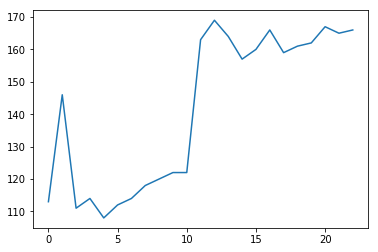

Plot: 13
[ 185.          184.          128.39013453  122.          121.31818182
  122.          123.33333333  119.77777778  124.14285714  128.5         133.
  180.          182.          182.          181.          183.          182.
  182.          182.          179.          180.          180.          181.        ]


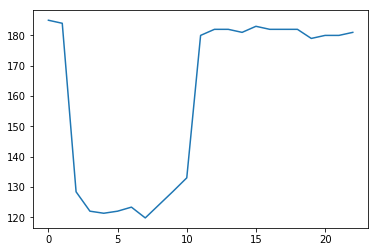

Plot: 14
[ 180.   81.  178.  183.  178.  182.  181.  184.  182.  186.  185.  127.
  126.  129.  126.  128.  130.  129.  128.  130.  129.  129.  131.]


Plot: 15
[ 175.  165.   91.   89.   88.   94.   92.   94.   96.   92.   98.  149.
  146.  146.  147.  148.  146.  148.  144.  144.  147.  143.  144.]


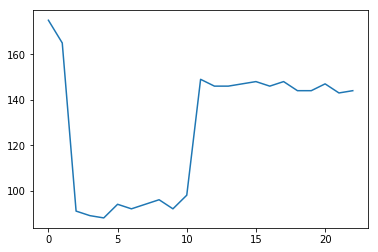

Plot: 16
[ 117.  119.  119.  125.  123.  123.  127.  129.  131.  130.  138.  187.
  185.  187.  186.  183.  186.  189.  185.  182.  184.  184.  186.]


Plot: 17
[ 183.  154.  139.  137.  138.  140.  140.  144.  142.  145.  146.  187.
  189.  185.  187.  189.  186.  187.  188.  187.  186.  185.  187.]


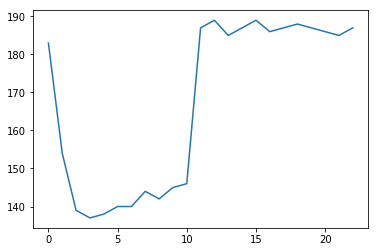

Plot: 18
[ 169.     127.125  182.     183.     178.     179.     185.     178.     182.
  186.     187.     136.     139.     137.     137.     140.     136.     136.
  135.     138.     141.     141.     143.   ]


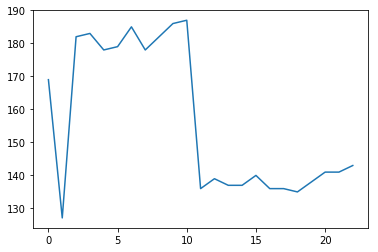

Plot: 19
[ 166.  173.  170.  175.  171.  174.  172.  176.  178.  176.  175.  169.
  168.  167.  169.  171.  169.  169.  169.  168.  169.  169.  166.]


Plot: 20
[ 121.  115.  137.  138.  140.  134.  141.  146.  143.  144.  144.  156.
  156.  158.  156.  159.  158.  156.  160.  158.  160.  161.  163.]


Plot: 21
[ 191.  190.  190.  192.  189.  190.  194.  191.  192.  193.  191.  188.
  188.  186.  187.  186.  185.  183.  187.  189.  187.  191.  187.]


Plot: 22
[ 113.  188.  187.  187.  187.  186.  185.  185.  188.  187.  188.  190.
  190.  188.  191.  193.  191.  191.  190.  188.  187.  190.  189.]


Plot: 23
[ 198.  172.  179.  180.  179.  180.  181.  181.  183.  181.  182.  187.
  186.  184.  184.  185.  183.  187.  186.  187.  181.  185.  186.]


Plot: 24
[ 139.  119.  127.  133.  131.  134.  138.  141.  135.  141.  144.  170.
  168.  167.  169.  169.  169.  167.  166.  164.  166.  169.  171.]


Plot: 25
[ 190.  188.  189.  188.  190.  190.  188.  188.  192.  191.  192.  191.
  189.  188.  191.  192.  187.  192.  190.  188.  191.  191.  187.]


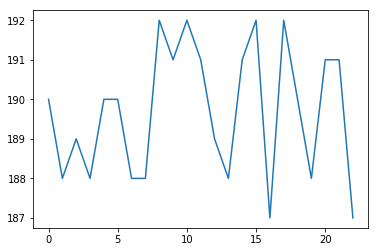

Plot: 26
[ 116.  151.  170.  176.  177.  175.  172.  177.  178.  176.  180.  188.
  189.  187.  188.  188.  188.  187.  188.  187.  188.  188.  184.]


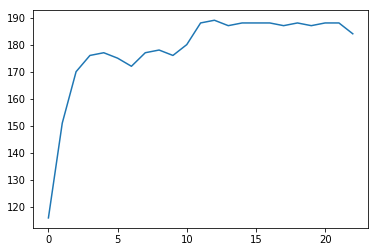

Plot: 27
[ 214.  216.  183.  179.  177.  176.  177.  178.  181.  177.  182.  197.
  196.  194.  190.  193.  192.  195.  192.  197.  196.  195.  196.]


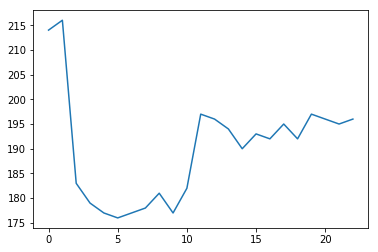

Plot: 28
[ 181.  126.  134.  137.  137.  136.  139.  140.  144.  146.  147.  190.
  190.  186.  190.  185.  189.  188.  189.  187.  189.  186.  187.]


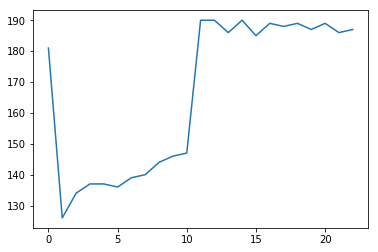

Plot: 29
[ 147.  182.  189.  191.  186.  186.  187.  188.  190.  189.  190.  190.
  188.  191.  191.  188.  188.  185.  191.  188.  190.  190.  190.]


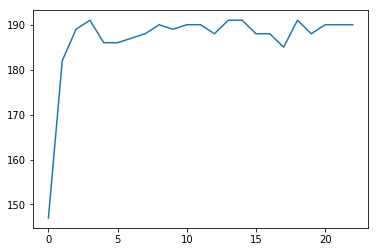

Plot: 30
[ 185.  192.  187.  190.  188.  191.  189.  190.  191.  189.  190.  186.
  188.  189.  189.  190.  189.  191.  187.  188.  186.  188.  187.]


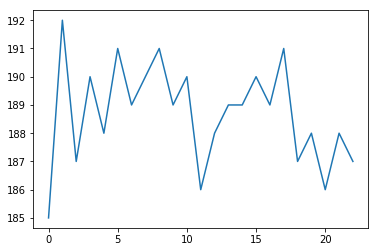

Plot: 31
[ 167.  203.  213.  220.  217.  213.  209.  213.  217.  216.  213.  181.
  179.  177.  176.  179.  173.  176.  178.  175.  175.  178.  176.]


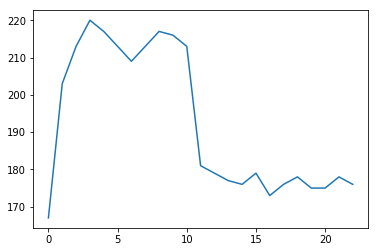

In [83]:
print("G Values")
plt.figure(1)

for i in range(0,len(graphList)):
    print("Plot: " + str(i))
    gList = []
    for r,g,b in graphList[i]:
        gList.append(g)
    gList = np.array(gList)    
    nImages = len(gList)
    plt.figure(1)
    print(gList)
    plt.plot(gList)
    plt.savefig("Gvalues "+str(i) +".png")
    plt.show()

B Values
Plot: 0
[ 129.75  116.    113.    118.    111.    112.    110.    116.    114.
  117.    120.    119.    120.    117.    115.    115.    118.    115.
  116.    115.    109.    112.    113.  ]


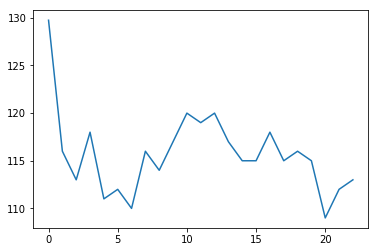

Plot: 1
[ 113.  115.  108.  109.  109.  107.  103.  109.  108.  115.  112.  111.
  110.  111.  113.  111.  111.  108.  110.  113.  108.  106.  105.]


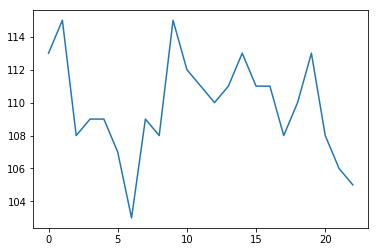

Plot: 2
[ 111.  112.  104.  112.  107.  104.  105.  106.  104.  108.  111.  112.
  113.  113.  111.  114.  115.  109.  110.  112.  110.  110.  109.]


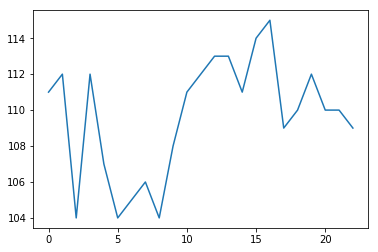

Plot: 3
[  92.  124.  105.  115.  107.  106.  110.  108.  111.  111.  116.  115.
  117.  117.  117.  116.  116.  117.  115.  115.  113.  112.  113.]


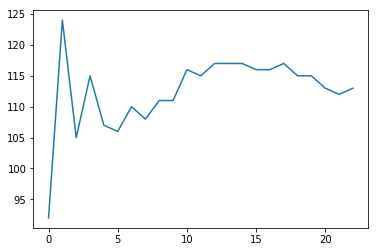

Plot: 4
[  98.   98.   95.   98.   94.   94.   92.   95.   92.  100.   97.  104.
  102.  104.  105.  103.  103.  101.  105.  105.   98.   96.  100.]


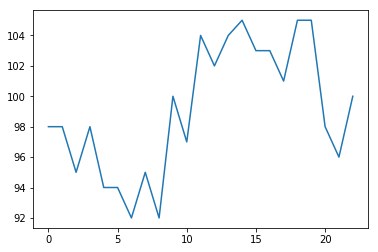

Plot: 5
[ 85.  84.  82.  86.  81.  81.  81.  81.  82.  84.  87.  86.  87.  87.  87.
  84.  87.  87.  88.  87.  84.  81.  82.]


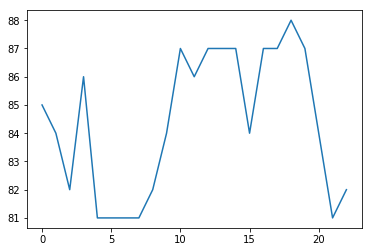

Plot: 6
[ 89.  89.  80.  84.  80.  76.  78.  80.  81.  82.  84.  83.  86.  80.  85.
  80.  83.  82.  85.  81.  75.  76.  82.]


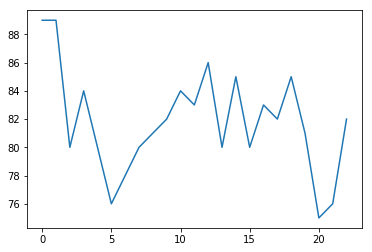

Plot: 7
[ 174.         97.        121.        130.984375  114.        118.        114.
  120.        113.        120.        120.         85.         81.         83.
   85.         81.         81.         82.         83.         84.         78.
   78.         77.      ]


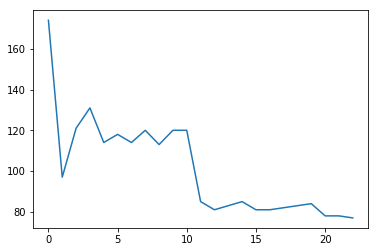

Plot: 8
[ 154.  188.  125.  128.  126.  124.  124.  126.  128.  132.  130.   97.
   97.   94.   95.   95.   95.   95.   97.   97.   91.   92.   92.]


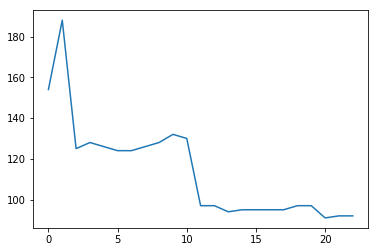

Plot: 9
[ 182.          185.          125.          130.          122.          125.
  122.          129.          126.          111.67217631  113.96933962
  180.          182.          185.          182.          179.          184.
  181.          183.          184.          180.          176.          185.        ]


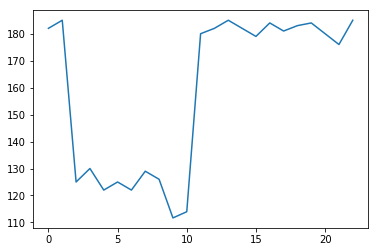

Plot: 10
[  87.  153.  171.  177.  179.  173.  175.  177.  171.  180.  178.  126.
  129.  130.  128.  128.  127.  130.  123.  127.  124.  125.  127.]


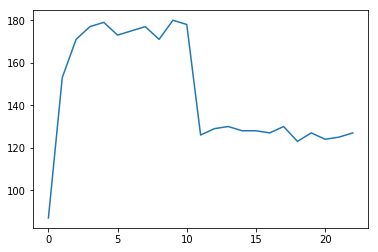

Plot: 11
[ 171.  169.   96.   94.   93.   95.   98.   96.   96.  101.   96.  173.
  173.  175.  174.  173.  173.  173.  170.  172.  169.  173.  171.]


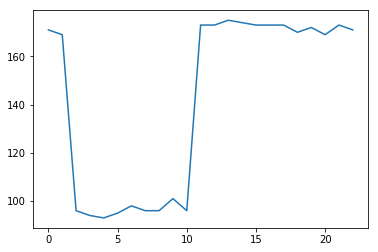

Plot: 12
[ 131.  158.  131.  135.  130.  131.  129.  134.  137.  140.  139.  161.
  167.  163.  160.  163.  163.  157.  159.  160.  165.  163.  166.]


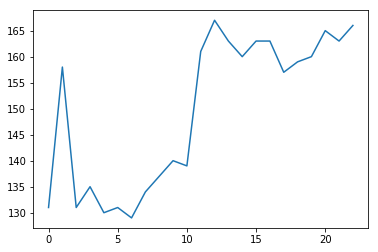

Plot: 13
[ 181.          180.          116.30044843  140.          111.72727273
  136.          113.58333333  112.88888889  116.28571429  128.          146.
  176.          175.          177.          174.          178.          177.
  175.          178.          176.          173.          176.          176.        ]


Plot: 14
[ 176.   87.  174.  179.  173.  177.  174.  177.  175.  180.  178.  142.
  141.  129.  141.  143.  145.  141.  142.  145.  140.  141.  143.]


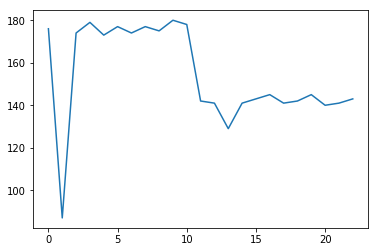

Plot: 15
[ 171.  159.   94.   95.   93.   95.   94.   95.   96.   94.  100.  155.
  152.  151.  155.  153.  152.  154.  150.  151.  152.  149.  150.]


Plot: 16
[ 150.  153.  151.  156.  152.  152.  152.  158.  158.  157.  162.  186.
  182.  185.  185.  180.  185.  187.  184.  182.  180.  181.  182.]


Plot: 17
[ 180.  160.  154.  160.  159.  156.  158.  161.  153.  162.  163.  183.
  182.  181.  183.  185.  182.  183.  184.  184.  179.  178.  180.]


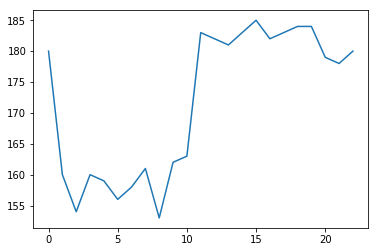

Plot: 18
[ 171.    127.25  178.    179.    174.    173.    178.    174.    175.
  179.    183.    159.    159.    159.    161.    163.    157.    159.
  159.    164.    161.    160.    165.  ]


Plot: 19
[ 164.  169.  166.  171.  168.  169.  168.  172.  171.  172.  171.  178.
  175.  177.  178.  177.  178.  177.  176.  176.  175.  176.  175.]


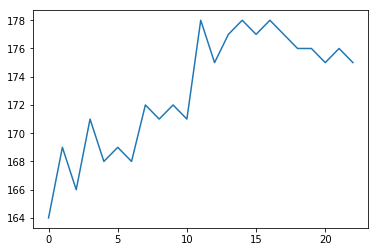

Plot: 20
[ 169.  164.  169.  172.  173.  166.  172.  177.  172.  173.  173.  164.
  161.  162.  164.  162.  162.  162.  165.  167.  163.  162.  164.]


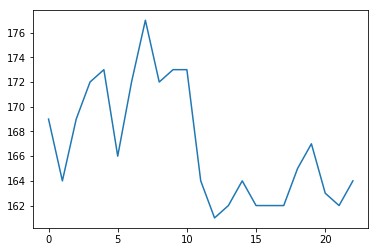

Plot: 21
[ 187.  189.  186.  188.  185.  185.  187.  187.  188.  189.  187.  184.
  184.  184.  185.  183.  181.  179.  184.  186.  183.  186.  183.]


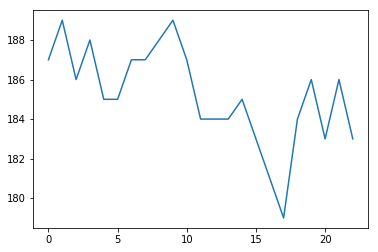

Plot: 22
[ 176.  186.  183.  183.  183.  180.  178.  179.  182.  184.  182.  184.
  183.  184.  187.  186.  187.  184.  183.  184.  181.  184.  182.]


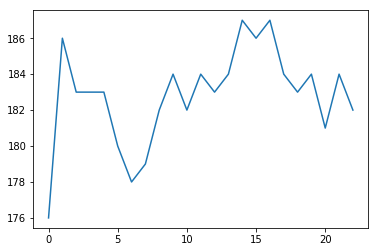

Plot: 23
[ 205.  168.  175.  179.  174.  176.  174.  177.  179.  177.  175.  195.
  197.  192.  194.  193.  195.  195.  196.  196.  193.  196.  194.]


Plot: 24
[ 174.  173.  174.  177.  176.  177.  178.  182.  172.  178.  179.  172.
  170.  167.  169.  169.  169.  167.  168.  168.  166.  168.  169.]


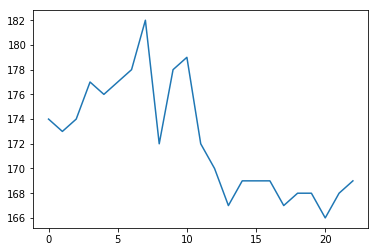

Plot: 25
[ 187.  184.  188.  188.  186.  186.  181.  184.  188.  187.  188.  187.
  185.  184.  187.  188.  183.  186.  186.  186.  185.  184.  182.]


Plot: 26
[ 187.  179.  174.  180.  178.  177.  174.  177.  178.  177.  180.  184.
  183.  183.  182.  182.  184.  181.  182.  183.  181.  182.  180.]


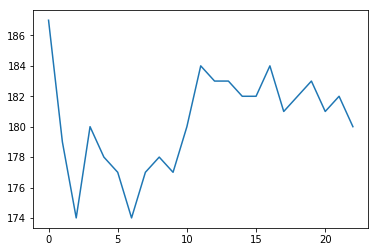

Plot: 27
[ 213.  215.  175.  170.  170.  168.  171.  172.  174.  172.  177.  202.
  204.  201.  200.  199.  201.  203.  199.  207.  204.  202.  201.]


Plot: 28
[ 180.  193.  190.  195.  193.  189.  188.  189.  193.  195.  193.  187.
  187.  183.  187.  182.  186.  183.  186.  186.  186.  183.  184.]


Plot: 29
[ 159.  179.  185.  187.  184.  182.  183.  184.  186.  187.  186.  186.
  182.  187.  184.  184.  184.  179.  187.  186.  183.  184.  183.]


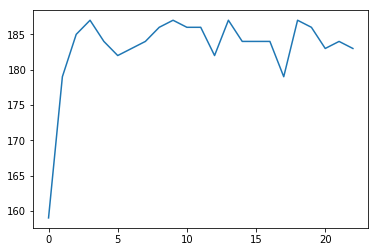

Plot: 30
[ 183.  191.  184.  187.  184.  187.  183.  186.  185.  185.  184.  181.
  183.  185.  183.  184.  183.  185.  183.  184.  179.  182.  181.]


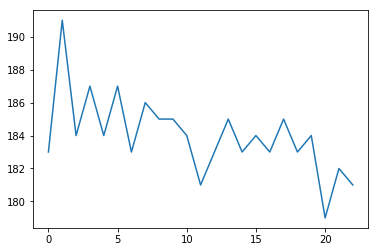

Plot: 31
[ 164.  198.  201.  209.  204.  201.  195.  202.  201.  201.  200.  175.
  172.  174.  172.  175.  169.  170.  174.  174.  171.  172.  173.]


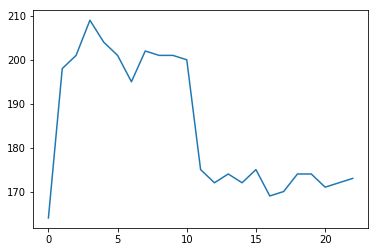

In [84]:
print("B Values")
plt.figure(1)

for i in range(0,len(graphList)):
    print("Plot: " + str(i))
    bList = []
    for r,g,b in graphList[i]:
        bList.append(b)
    bList = np.array(bList)  
    plt.figure(1)
    print(bList)
    plt.plot(bList)
    plt.savefig("Bvalues "+str(i) +".png")
    plt.show()

Below are the plots of the input variables along the x-axis versus the target variables along the y-axis.
From the data arrangement it does not seem that a linear fit will work well for this set since almost all of the graphs are in a none linear formation.